In [1]:
import glob, os, json, random
import cv2
from convert import yolo2coco
from visualization import show

In [26]:
srcPath = "/home/jovyan/nas-dataset/recycling"
dstPath = "/home/jovyan/data-vol-1/detreg_latest/_data/downstream"

class PrepareDownstream: # yolo2coco
    def __init__(self, imgFolder, antFolder, classL, dstName="example"):
        self.imgPathL = [ imgPath for imgPath in sorted(glob.glob(f"{srcPath}/{imgFolder}/*.jpg")) ]
        self.antPathL = [ antPath for antPath in sorted(glob.glob(f"{srcPath}/{antFolder}/*.txt")) if "classes.txt" not in antPath ]
        print( f"len(self.imgPathL)={len(self.imgPathL)}, len(self.antPathL)={len(self.antPathL)}" )    
        self.classL   = classL
        self.dstPath  = f"{dstPath}/{dstName}"
    
    def checkShape(self): # optional
        self.shapeD = {}
        for imgPath in self.imgPathL:
            shape = cv2.imread(imgPath).shape
            self.shapeD[shape] = (self.shapeD[shape] if shape in self.shapeD else []) + [shape]
        print( f"checkShape:", { shape:len(self.shapeD[shape]) for shape in self.shapeD } )
            
    def checkClass(self): # optional
        self.classN = [0]*len(self.classL)
        for i,antPath in enumerate(self.antPathL):
            for line in open(antPath,"r").readlines():
                cid, cx, cy, w, h = line.replace("\n","").split(" ")
                self.classN[int(cid)]+=1
                assert 0<=float(cx)<=1 or not 0<=float(cy)<=1 or not 0<=float(w)<=1 or not 0<=float(h)<=1, antPath
        print( f"checkClass:", self.classN )
    
    def convertCoco(self, group="train"):
        os.makedirs(f"{self.dstPath}/MSCoco/{group}2017", exist_ok=True)
        for imgPath in self.imgPathL:
            os.system(f"cp {imgPath} {self.dstPath}/MSCoco/{group}2017")
        os.makedirs(f"{self.dstPath}/MSCoco/annotations", exist_ok=True)
        yolo2coco( os.path.dirname(self.antPathL[0]), f"{self.dstPath}/MSCoco/annotations/instances_{group}2017.json", classL=self.classL, defaultAspect=(720,1280) )
    
    def show(self, n=1):
        for i in range(n):
            r = random.randint(0,len(self.imgPathL)-1)
            show( self.imgPathL[r], self.antPathL[r], classList=self.classL )

len(self.imgPathL)=3145, len(self.antPathL)=3145


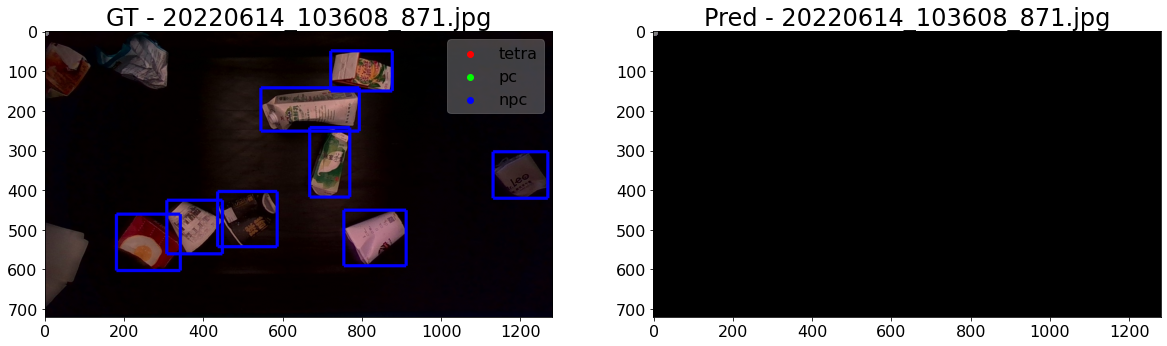

In [21]:
obj = PrepareDownstream("backboneData/2022-06-14", "backboneData/2022-06-14_label_papercontainer_v5", ['tetra','npc','pc'], "example")
#obj.checkShape()
#obj.checkClass()
#obj.convertCoco()
obj.show()

len(self.imgPathL)=29217, len(self.antPathL)=29217
checkClass: [27632, 38164, 115408]
29217/29217

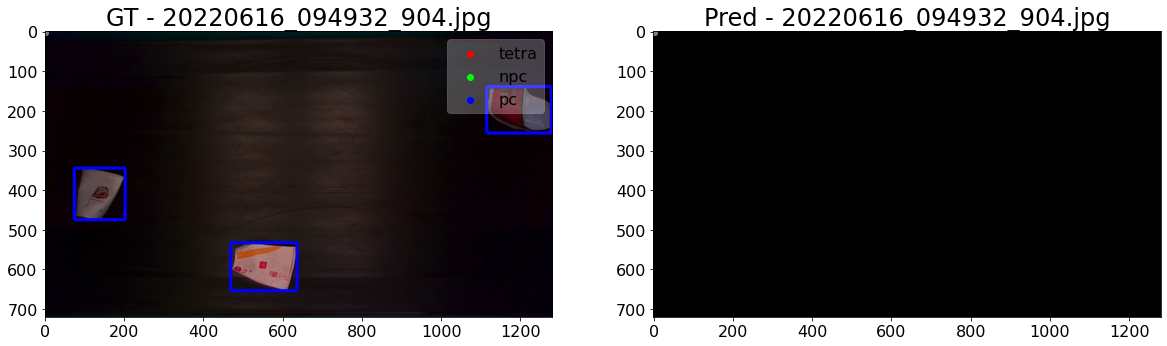

In [27]:
obj = PrepareDownstream("DF_WuGu_Relay_36K/trainset", "DF_WuGu_Relay_36K/trainset", ['tetra','npc','pc'], "wuguv1")
#obj.checkShape()
obj.checkClass()
obj.convertCoco()
obj.show()

len(self.imgPathL)=7306, len(self.antPathL)=7306
checkClass: [6927, 9573, 28837]
7306/7306

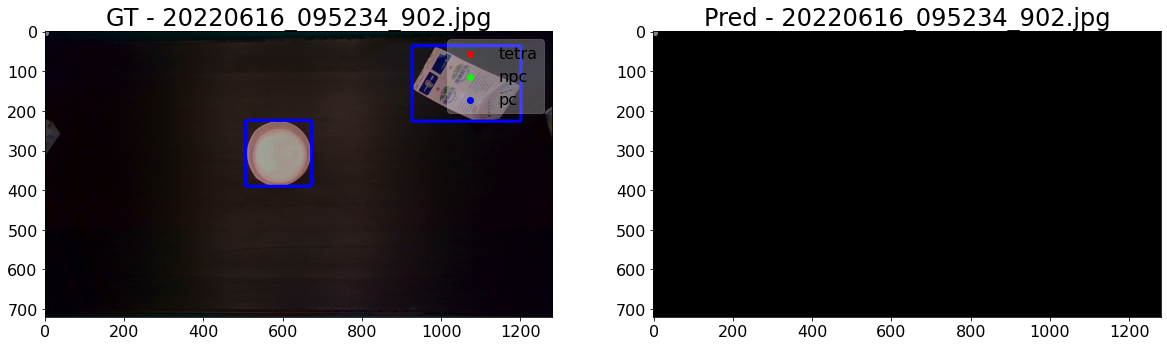

In [25]:
obj = PrepareDownstream("DF_WuGu_Relay_36K/testset", "DF_WuGu_Relay_36K/testset", ['tetra','npc','pc'], "wuguv1_test")
#obj.checkShape()
obj.checkClass()
obj.convertCoco("val")
obj.show()